In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName("LinearRegression").getOrCreate()

In [3]:
df_pyspark=spark.read.csv("Google_train_data.csv",header=True,inferSchema=True)

In [4]:
df_pyspark.head(10)

[Row(Date='1/3/2012', Open=325.25, High=332.83, Low=324.97, Close='663.59', Volume='7,380,500'),
 Row(Date='1/4/2012', Open=331.27, High=333.87, Low=329.08, Close='666.45', Volume='5,749,400'),
 Row(Date='1/5/2012', Open=329.83, High=330.75, Low=326.89, Close='657.21', Volume='6,590,300'),
 Row(Date='1/6/2012', Open=328.34, High=328.77, Low=323.68, Close='648.24', Volume='5,405,900'),
 Row(Date='1/9/2012', Open=322.04, High=322.29, Low=309.46, Close='620.76', Volume='11,688,800'),
 Row(Date='1/10/2012', Open=313.7, High=315.72, Low=307.3, Close='621.43', Volume='8,824,000'),
 Row(Date='1/11/2012', Open=310.59, High=313.52, Low=309.4, Close='624.25', Volume='4,817,800'),
 Row(Date='1/12/2012', Open=314.43, High=315.26, Low=312.08, Close='627.92', Volume='3,764,400'),
 Row(Date='1/13/2012', Open=311.96, High=312.3, Low=309.37, Close='623.28', Volume='4,631,800'),
 Row(Date='1/17/2012', Open=314.81, High=314.81, Low=311.67, Close='626.86', Volume='3,832,800')]

In [5]:
df_pyspark.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [6]:
df_pyspark=df_pyspark.dropna()

In [7]:
df_pyspark.count()

1258

In [8]:
df_pyspark.select(["Open","High","Close"]).show()

+------+------+------+
|  Open|  High| Close|
+------+------+------+
|325.25|332.83|663.59|
|331.27|333.87|666.45|
|329.83|330.75|657.21|
|328.34|328.77|648.24|
|322.04|322.29|620.76|
| 313.7|315.72|621.43|
|310.59|313.52|624.25|
|314.43|315.26|627.92|
|311.96| 312.3|623.28|
|314.81|314.81|626.86|
|312.14|315.82|631.18|
| 319.3| 319.3|637.82|
|294.16| 294.4|584.39|
|291.91|293.23|583.92|
|292.07|292.74|579.34|
|287.68|288.27|567.93|
|284.92|286.17|566.54|
|284.32|289.08|578.39|
|287.95|288.92|576.11|
|290.41|290.91|578.52|
+------+------+------+
only showing top 20 rows



In [9]:
df_pyspark.withColumn("Close + 2",df_pyspark["Close"]+2).show()

+---------+------+------+------+------+----------+---------+
|     Date|  Open|  High|   Low| Close|    Volume|Close + 2|
+---------+------+------+------+------+----------+---------+
| 1/3/2012|325.25|332.83|324.97|663.59| 7,380,500|   665.59|
| 1/4/2012|331.27|333.87|329.08|666.45| 5,749,400|   668.45|
| 1/5/2012|329.83|330.75|326.89|657.21| 6,590,300|   659.21|
| 1/6/2012|328.34|328.77|323.68|648.24| 5,405,900|   650.24|
| 1/9/2012|322.04|322.29|309.46|620.76|11,688,800|   622.76|
|1/10/2012| 313.7|315.72| 307.3|621.43| 8,824,000|   623.43|
|1/11/2012|310.59|313.52| 309.4|624.25| 4,817,800|   626.25|
|1/12/2012|314.43|315.26|312.08|627.92| 3,764,400|   629.92|
|1/13/2012|311.96| 312.3|309.37|623.28| 4,631,800|   625.28|
|1/17/2012|314.81|314.81|311.67|626.86| 3,832,800|   628.86|
|1/18/2012|312.14|315.82| 309.9|631.18| 5,544,000|   633.18|
|1/19/2012| 319.3| 319.3|314.55|637.82|12,657,800|   639.82|
|1/20/2012|294.16| 294.4|289.76|584.39|21,231,800|   586.39|
|1/23/2012|291.91|293.23

In [10]:
df_pyspark=df_pyspark.na.drop(how="all")

In [11]:
df_pyspark.describe().show()

+-------+---------+------------------+------------------+------------------+------------------+---------+
|summary|     Date|              Open|              High|               Low|             Close|   Volume|
+-------+---------+------------------+------------------+------------------+------------------+---------+
|  count|     1258|              1258|              1258|              1258|              1258|     1258|
|   mean|     NULL| 533.7098330683621| 537.8802225755155| 529.0074085850564| 674.7755265448224|     NULL|
| stddev|     NULL|151.90444191569614|153.00881086661133|150.55280733768137|112.58269558319842|     NULL|
|    min|1/10/2012|            279.12|            281.21|            277.22|          1,000.55|1,005,000|
|    max| 9/9/2016|            816.68|            816.68|            805.14|            922.16|  989,100|
+-------+---------+------------------+------------------+------------------+------------------+---------+



In [12]:
df_pyspark.dtypes

[('Date', 'string'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'string'),
 ('Volume', 'string')]

In [13]:
from pyspark.sql.functions import col

In [14]:
df_pyspark=df_pyspark.drop("Date")

In [15]:
df_pyspark = df_pyspark.select([col(c).cast("double").alias(c) for c in df_pyspark.columns])

In [16]:
df_pyspark.dtypes

[('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Volume', 'double')]

In [17]:
df_pyspark.printSchema()

root
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)



In [18]:
df_pyspark.select(["Open","High","Low","Close","Volume"]).show()

+------+------+------+------+------+
|  Open|  High|   Low| Close|Volume|
+------+------+------+------+------+
|325.25|332.83|324.97|663.59|  NULL|
|331.27|333.87|329.08|666.45|  NULL|
|329.83|330.75|326.89|657.21|  NULL|
|328.34|328.77|323.68|648.24|  NULL|
|322.04|322.29|309.46|620.76|  NULL|
| 313.7|315.72| 307.3|621.43|  NULL|
|310.59|313.52| 309.4|624.25|  NULL|
|314.43|315.26|312.08|627.92|  NULL|
|311.96| 312.3|309.37|623.28|  NULL|
|314.81|314.81|311.67|626.86|  NULL|
|312.14|315.82| 309.9|631.18|  NULL|
| 319.3| 319.3|314.55|637.82|  NULL|
|294.16| 294.4|289.76|584.39|  NULL|
|291.91|293.23|290.49|583.92|  NULL|
|292.07|292.74|287.92|579.34|  NULL|
|287.68|288.27|282.13|567.93|  NULL|
|284.92|286.17|281.22|566.54|  NULL|
|284.32|289.08| 283.6|578.39|  NULL|
|287.95|288.92|285.63|576.11|  NULL|
|290.41|290.91| 286.5|578.52|  NULL|
+------+------+------+------+------+
only showing top 20 rows



In [19]:
df_pyspark=df_pyspark.drop("Volume")

In [20]:
df_pyspark.printSchema()

root
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)



In [21]:
df_pyspark.filter("Close >650").show()

+------+------+------+------+
|  Open|  High|   Low| Close|
+------+------+------+------+
|325.25|332.83|324.97|663.59|
|331.27|333.87|329.08|666.45|
|329.83|330.75|326.89|657.21|
| 324.8|328.07|324.32|653.96|
| 322.5|328.84|322.13| 658.2|
|328.39|335.17|328.27|666.83|
|333.89|335.87|330.81|665.71|
|332.51|336.06|332.29|671.03|
| 335.8|337.36| 334.6|675.29|
|336.49|338.17|335.07|673.69|
| 335.3|337.73|329.85|667.68|
|332.44|339.03|332.11|675.33|
|335.88|338.97|334.25|674.95|
|336.54|338.95|335.78|676.77|
|330.26|334.75|328.39|667.39|
|331.26|337.54|331.13| 675.4|
|337.42|343.21|336.81|686.13|
|340.84|342.41|338.82|679.81|
|340.72| 343.0|338.75|683.21|
| 341.0|341.22|335.49|679.18|
+------+------+------+------+
only showing top 20 rows



In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
df_pyspark.head(5)

[Row(Open=325.25, High=332.83, Low=324.97, Close=663.59),
 Row(Open=331.27, High=333.87, Low=329.08, Close=666.45),
 Row(Open=329.83, High=330.75, Low=326.89, Close=657.21),
 Row(Open=328.34, High=328.77, Low=323.68, Close=648.24),
 Row(Open=322.04, High=322.29, Low=309.46, Close=620.76)]

In [24]:
assembler=VectorAssembler(inputCols=["Open","High","Low"],outputCol="features")

In [25]:
assembler

VectorAssembler_868aa31fa73a

In [26]:
type(assembler)

pyspark.ml.feature.VectorAssembler

In [27]:
df_pyspark.printSchema()

root
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)



In [28]:
df=df_pyspark.na.drop()

In [29]:
assembler_df=assembler.transform(df)

In [30]:
assembler_df.dtypes

[('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('features', 'vector')]

In [31]:
final_df=assembler_df.select(["features","close"])

In [32]:
final_df.describe()

DataFrame[summary: string, close: string]

In [33]:
final_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- close: double (nullable = true)



In [34]:
final_df.select(["features","close"]).show()

+--------------------+------+
|            features| close|
+--------------------+------+
|[325.25,332.83,32...|663.59|
|[331.27,333.87,32...|666.45|
|[329.83,330.75,32...|657.21|
|[328.34,328.77,32...|648.24|
|[322.04,322.29,30...|620.76|
|[313.7,315.72,307.3]|621.43|
|[310.59,313.52,30...|624.25|
|[314.43,315.26,31...|627.92|
|[311.96,312.3,309...|623.28|
|[314.81,314.81,31...|626.86|
|[312.14,315.82,30...|631.18|
|[319.3,319.3,314.55]|637.82|
|[294.16,294.4,289...|584.39|
|[291.91,293.23,29...|583.92|
|[292.07,292.74,28...|579.34|
|[287.68,288.27,28...|567.93|
|[284.92,286.17,28...|566.54|
|[284.32,289.08,28...|578.39|
|[287.95,288.92,28...|576.11|
|[290.41,290.91,28...|578.52|
+--------------------+------+
only showing top 20 rows



In [35]:
lr=LinearRegression(featuresCol="features",labelCol="close")

In [36]:
lr_model=lr.fit(final_df)

In [38]:
predictions=lr_model.transform(final_df)

In [39]:
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- close: double (nullable = true)
 |-- prediction: double (nullable = false)



In [43]:
predictions.select(["close","prediction"])

DataFrame[close: double, prediction: double]

In [44]:
predictions_df=predictions.toPandas()

In [45]:
predictions_df.head(10)

,features,close,prediction
0,"[325.25, 332.83, 324.97]",663.59,653.367222
1,"[331.27, 333.87, 329.08]",666.45,659.403491
2,"[329.83, 330.75, 326.89]",657.21,660.539770
3,"[328.34, 328.77, 323.68]",648.24,655.052631
4,"[322.04, 322.29, 309.46]",620.76,624.708817
5,"[313.7, 315.72, 307.3]",621.43,642.422633
6,"[310.59, 313.52, 309.4]",624.25,659.368985
7,"[314.43, 315.26, 312.08]",627.92,660.764640
8,"[311.96, 312.3, 309.37]",623.28,660.719736
9,"[314.81, 314.81, 311.67]",626.86,659.901113


In [47]:
predictions_df=predictions_df[["close","prediction"]]

<AxesSubplot:>

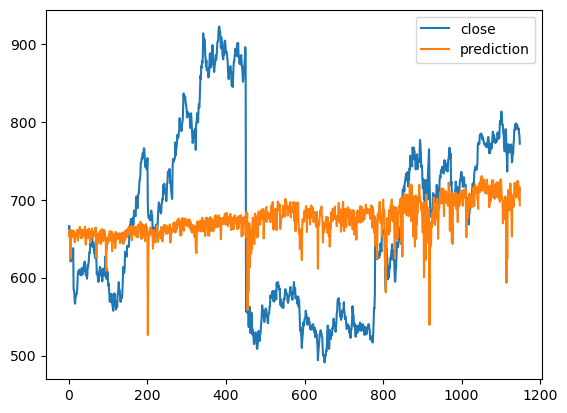

In [48]:
predictions_df.plot(kind="line")